In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import csv
import random

import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

import MusicGenreClassificationTool as mgc

## Data preparation

In [ ]:
mgc.extractFeaturesToCSV()

In [ ]:
mgc.saveSpectrogramsToPNG()

In [2]:
mgc.saveSpectrogramsToNPZ()

Currently processing:  100  in Electronic
Currently processing:  200  in Electronic
Currently processing:  300  in Electronic
Currently processing:  400  in Electronic
Currently processing:  500  in Electronic
Currently processing:  600  in Electronic
Currently processing:  700  in Electronic
Currently processing:  800  in Electronic
Currently processing:  900  in Electronic
Currently processing:  100  in Experimental
Currently processing:  200  in Experimental
Currently processing:  300  in Experimental
Currently processing:  400  in Experimental
Currently processing:  500  in Experimental
Currently processing:  600  in Experimental
Currently processing:  700  in Experimental
Currently processing:  800  in Experimental
Currently processing:  900  in Experimental
Currently processing:  100  in Folk
Currently processing:  200  in Folk
Currently processing:  300  in Folk
Currently processing:  400  in Folk
Currently processing:  500  in Folk
Currently processing:  600  in Folk
Currently 

## Spectrograms (image)

### Load the data:

In [2]:
image_size = tuple((224, 224))

samples, labels = mgc.loadImages('img_data', image_size)

loaded 7997  samples
classes {'Electronic', 'Hip-Hop', 'Folk', 'International', 'Instrumental', 'Experimental', 'Rock', 'Pop'}
Labels shape (7997, 8)


In [3]:
dict_genres = mgc.makeDictionary()

reverse_map = {v: k for k, v in dict_genres.items()}

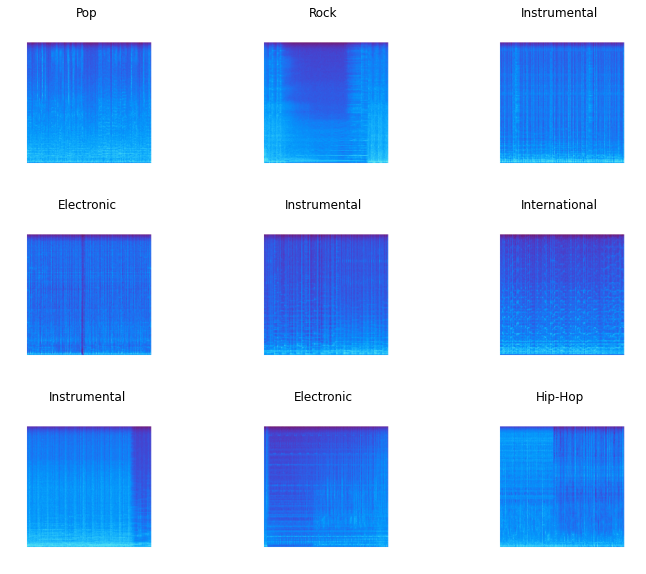

In [4]:
plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(samples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[n])
    genre = np.argmax(labels[n])
    plt.title(reverse_map[genre])
    plt.axis("off")

### Build the model:

In [6]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

input_shape = samples[0].shape

model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dense(64))
#model.add(Activation("relu"))
model.add(Dense(8))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [7]:
import sklearn.model_selection

(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,random_state=42,stratify=labels, test_size=0.5)
optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [8]:
history = model.fit(trainSamples, trainLabels, batch_size=64, epochs=20, validation_data=(testSamples,testLabels))  

Train on 3998 samples, validate on 3999 samples
Epoch 1/20
3998/3998 [==============================] - 57s 14ms/sample - loss: 198.5843 - accuracy: 0.1358 - val_loss: 71.7798 - val_accuracy: 0.1355
Epoch 2/20
3998/3998 [==============================] - 60s 15ms/sample - loss: 38.2489 - accuracy: 0.1581 - val_loss: 9.8331 - val_accuracy: 0.2231
Epoch 3/20
3998/3998 [==============================] - 59s 15ms/sample - loss: 6.1797 - accuracy: 0.1868 - val_loss: 4.1934 - val_accuracy: 0.1305
Epoch 4/20
3998/3998 [==============================] - 60s 15ms/sample - loss: 2.5967 - accuracy: 0.2191 - val_loss: 2.6203 - val_accuracy: 0.2723
Epoch 5/20
3998/3998 [==============================] - 60s 15ms/sample - loss: 2.0091 - accuracy: 0.2766 - val_loss: 2.1194 - val_accuracy: 0.2516
Epoch 6/20
3998/3998 [==============================] - 58s 14ms/sample - loss: 1.7461 - accuracy: 0.3547 - val_loss: 2.0161 - val_accuracy: 0.2961
Epoch 7/20
3998/3998 [==============================] - 61s 

### Test the model:

In [10]:
predicted = model.predict(testSamples)

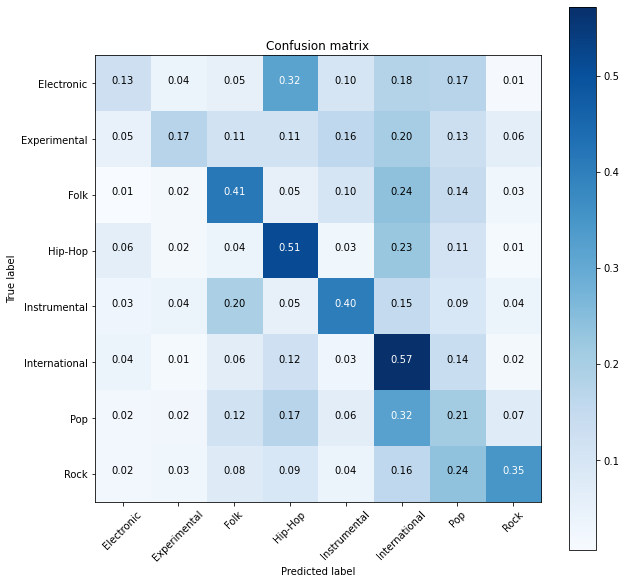

In [11]:
mgc.plotConfusionMatrix(testLabels.argmax(axis=1), predicted.argmax(axis=1), dict_genres, normalize=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


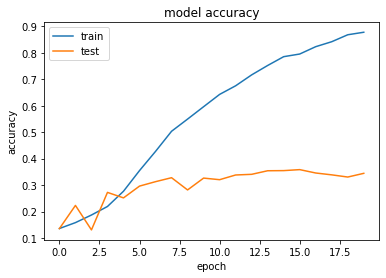

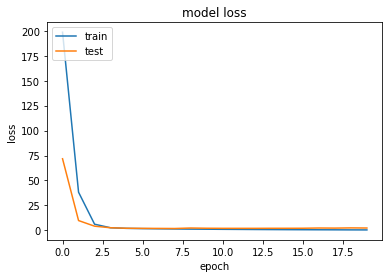

In [12]:
mgc.showSummaryStats(history)

## Spectrograms (array)

### Load the data:

In [2]:
samples, labels = mgc.loadArrays('data_arr.npz')

['arr_0', 'arr_1']
(7994, 640, 128) (7994, 8)


In [3]:
dict_genres = mgc.makeDictionary()

reverse_map = {v: k for k, v in dict_genres.items()}

Rock


C:\Users\Wojtek\anaconda3\envs\music-genre-classification\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Wojtek\anaconda3\envs\music-genre-classification\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


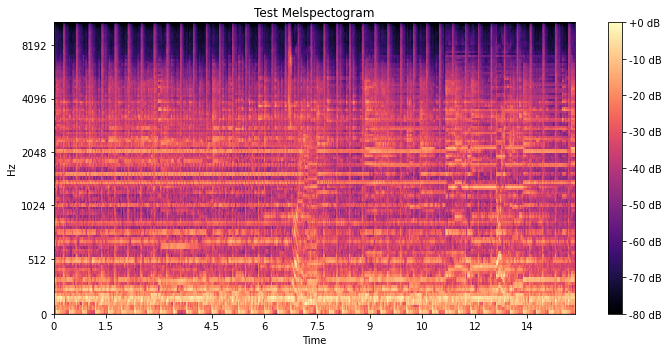

In [4]:
num = 7777
spectogram = samples[num]
genre = np.argmax(labels[num])
print(reverse_map[genre])
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectogram.T, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Test Melspectogram')
plt.tight_layout()

In [5]:
samples = np.expand_dims(samples, axis=3)
print(samples.shape, labels.shape)

(7994, 640, 128, 1) (7994, 8)


### Build the model:

In [6]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

input_shape = samples[0].shape

model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dense(64))
#model.add(Activation("relu"))
model.add(Dense(8))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 640, 128, 16)      160       
_________________________________________________________________
activation (Activation)      (None, 640, 128, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 320, 64, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 64, 32)       4640      
_________________________________________________________________
activation_1 (Activation)    (None, 320, 64, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 160, 32, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 163840)            0

In [7]:
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,random_state=42,stratify=labels, test_size=0.5)
optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [8]:
history = model.fit(trainSamples, trainLabels, batch_size=64, epochs=20, validation_data=(testSamples,testLabels)) 

Train on 3997 samples, validate on 3997 samples
Epoch 1/20
3997/3997 [==============================] - 78s 20ms/sample - loss: 75.5017 - accuracy: 0.1426 - val_loss: 43.4386 - val_accuracy: 0.1251
Epoch 2/20
3997/3997 [==============================] - 81s 20ms/sample - loss: 20.5044 - accuracy: 0.1726 - val_loss: 19.1760 - val_accuracy: 0.1253
Epoch 3/20
3997/3997 [==============================] - 82s 20ms/sample - loss: 6.3303 - accuracy: 0.2524 - val_loss: 4.5281 - val_accuracy: 0.2687
Epoch 4/20
3997/3997 [==============================] - 81s 20ms/sample - loss: 2.2314 - accuracy: 0.3855 - val_loss: 1.8372 - val_accuracy: 0.4008
Epoch 5/20
3997/3997 [==============================] - 82s 20ms/sample - loss: 1.1976 - accuracy: 0.5822 - val_loss: 1.7376 - val_accuracy: 0.4233
Epoch 6/20
3997/3997 [==============================] - 81s 20ms/sample - loss: 0.7525 - accuracy: 0.7613 - val_loss: 1.9916 - val_accuracy: 0.4203
Epoch 7/20
3997/3997 [==============================] - 81s 

### Test the model:

In [9]:
predicted = model.predict(testSamples)

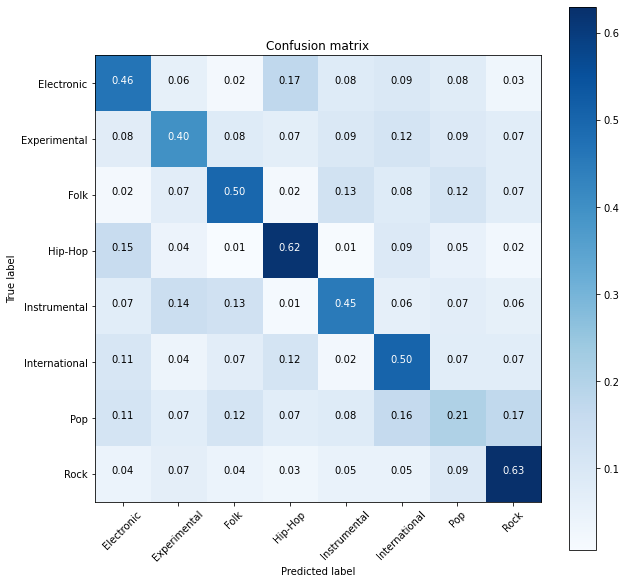

In [10]:
mgc.plotConfusionMatrix(testLabels.argmax(axis=1), predicted.argmax(axis=1), dict_genres, normalize=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


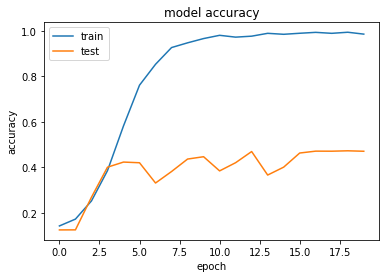

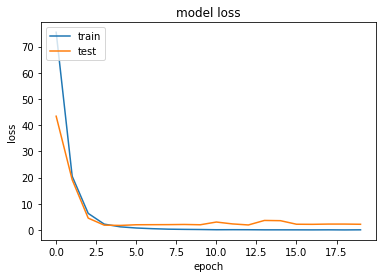

In [11]:
mgc.showSummaryStats(history)

## Features

### Load the data:

In [2]:
samples, labels = mgc.loadFeatures('features.csv')

### Build the model:

In [3]:
trainSamples, testSamples, trainLabels, testLabels = train_test_split(samples, labels, test_size=0.2)

In [4]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(trainSamples.shape[1],)))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(8, activation='softmax'))

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(trainSamples, trainLabels, epochs=100, batch_size=128, validation_data=(testSamples,testLabels))

Train on 6397 samples, validate on 1600 samples
Epoch 1/100
6397/6397 [==============================] - 1s 81us/sample - loss: 1.7999 - accuracy: 0.3252 - val_loss: 1.7272 - val_accuracy: 0.3544
Epoch 2/100
6397/6397 [==============================] - 0s 13us/sample - loss: 1.6157 - accuracy: 0.4154 - val_loss: 1.6788 - val_accuracy: 0.3825
Epoch 3/100
6397/6397 [==============================] - 0s 13us/sample - loss: 1.5468 - accuracy: 0.4455 - val_loss: 1.6526 - val_accuracy: 0.3988
Epoch 4/100
6397/6397 [==============================] - 0s 14us/sample - loss: 1.4980 - accuracy: 0.4608 - val_loss: 1.6490 - val_accuracy: 0.3944
Epoch 5/100
6397/6397 [==============================] - 0s 14us/sample - loss: 1.4565 - accuracy: 0.4751 - val_loss: 1.6218 - val_accuracy: 0.4075
Epoch 6/100
6397/6397 [==============================] - 0s 13us/sample - loss: 1.4238 - accuracy: 0.4846 - val_loss: 1.6102 - val_accuracy: 0.4150
Epoch 7/100
6397/6397 [==============================] - 0s 14us

### Test the model:

In [7]:
predicted = model.predict(testSamples)

In [8]:
dict_genres = mgc.makeDictionary()

reverse_map = {v: k for k, v in dict_genres.items()}

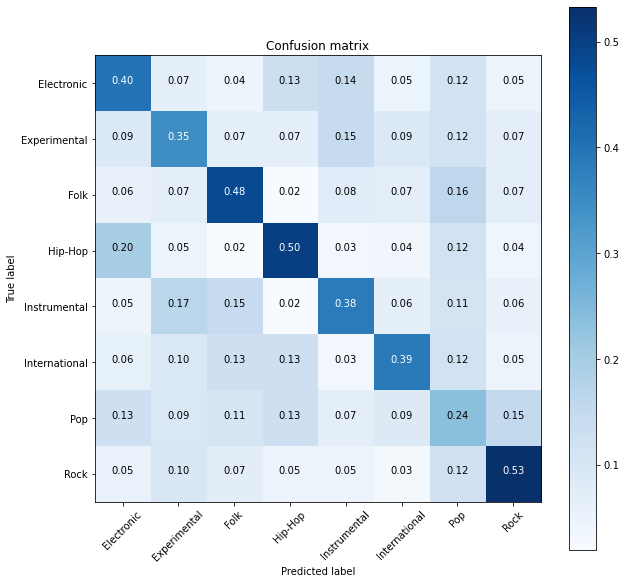

In [9]:
mgc.plotConfusionMatrix(testLabels, predicted.argmax(axis=1), dict_genres, normalize=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


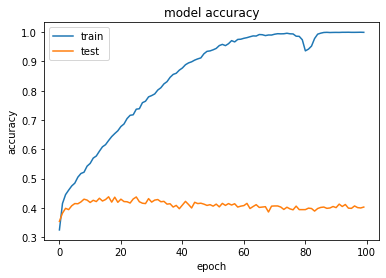

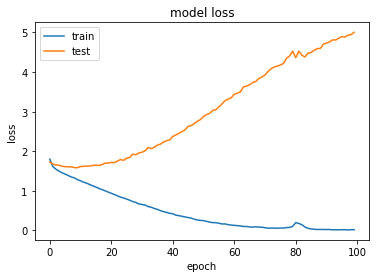

In [10]:
mgc.showSummaryStats(history)